# IPSL_10_years_trend_example with xarray and ProPlot

In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import proplot as plot

import sys
sys.path.insert(1, '../')
import utils as u
u.check_python_version()
u.check_virtual_memory()

3.7.5 (default, Oct 25 2019, 15:51:11) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 102 GB / percent used: 19.0 %


### Get the IPSL data (all members) from 2005 to 2014 for NH

In [2]:
def get_data():
    n_realization = 32 # 32
    list_da = []
    
    for i in range(1,n_realization+1):
        
        path = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r'+str(i)+'i1p1f1/LImon/snc/gr/latest/'\
               'snc_LImon_IPSL-CM6A-LR_historical_r'+str(i)+'i1p1f1_gr_185001-201412.nc'
        
        list_da.append(xr.open_dataset(path).snc.sel(time=slice('2005','2014'), lat=slice(20, 90)))

    snc = xr.concat(
        list_da, 
        pd.Index(['r'+str(i)+'i1p1f1' for i in range(1,n_realization+1)], name='realization')
    )
    
    return snc

In [3]:
ens_snow = get_data()
u.check_virtual_memory()
ens_snow

Virtual memory usage - total: 126 GB / available: 101 GB / percent used: 19.5 %


<xarray.DataArray 'snc' (realization: 32, time: 120, lat: 56, lon: 144)>
array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[ 0.,  0.,  0., ...,  0.,  0

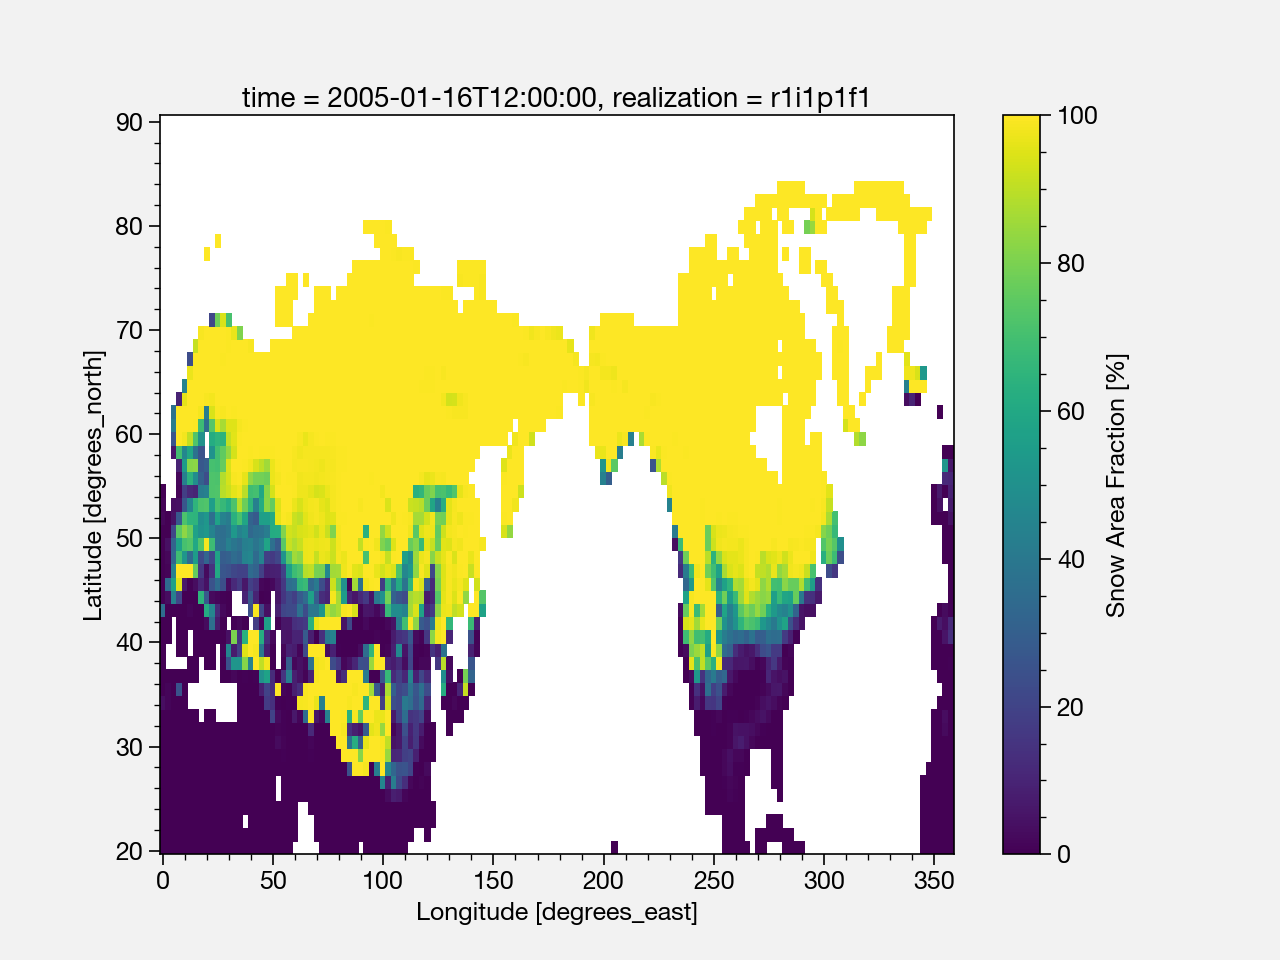

In [4]:
ens_snow[0,0].plot()

### Compute the MAM climatology

In [5]:
MAM_ens_cmip6 = u.custom_season_clim(ens_snow, calendar=ens_snow.time.encoding['calendar'], season='MAM')
MAM_ens_cmip6

<xarray.DataArray (realization: 32, lat: 56, lon: 144)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0

### Compute the ensemble mean

In [6]:
ens_avg_snow = MAM_ens_cmip6.mean('realization', skipna=False, keep_attrs=True)
ens_avg_snow

<xarray.DataArray (lat: 56, lon: 144)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 20.28169 21.549295 22.816902 ... 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    season   <U3 'MAM'
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

## Plot

In [7]:
# Add cyclic point -> don't need to do it with ProPlot -> globe=True
# ens_avg_snow_cyclic = u.cyclic_dataarray(ens_avg_snow)
# ens_avg_snow_cyclic

/home/mlalande/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
    return np.nanmean(a, axis=axis, dtype=dtype)



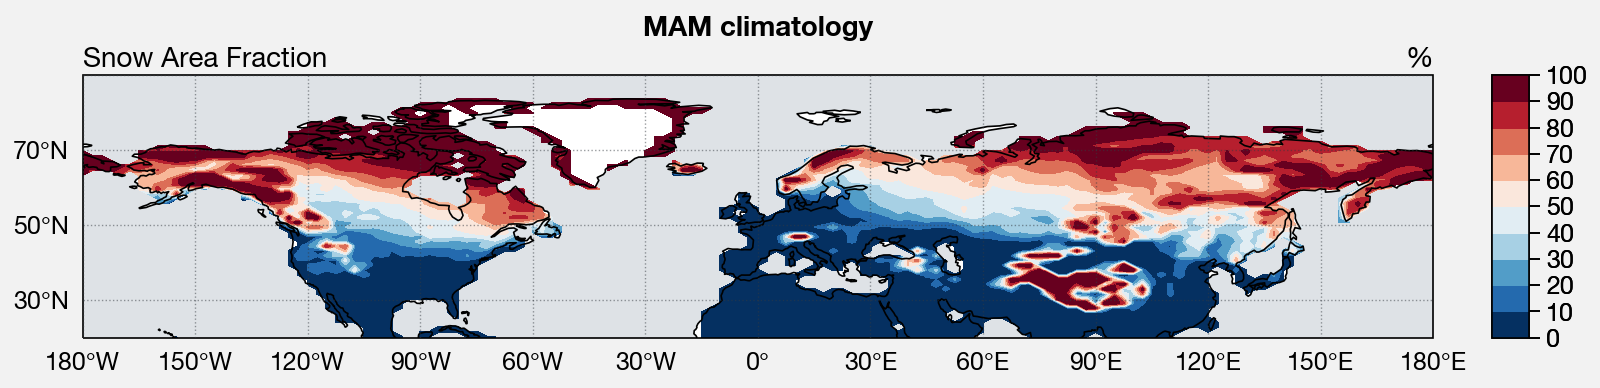

In [8]:
f, axs = plot.subplots(proj='cyl', width=8)

m = axs[0].contourf(ens_avg_snow, cmap='BuRd', globe=True)

f.colorbar(m)

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', latlim=(20,90),
    suptitle=str(ens_avg_snow.season.values) + ' climatology',
    ltitle=ens_avg_snow.long_name, rtitle=ens_avg_snow.units, title=''
)

### Monthly mean

In [10]:
monthly_snow = u.annual_cycle(ens_snow)
monthly_snow

<xarray.DataArray (realization: 32, month: 12, lat: 56, lon: 144)>
array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.

### Extract March and April

In [12]:
march_snow = monthly_snow.sel(month=3)
april_snow = monthly_snow.sel(month=4)

### Spatial average

In [24]:
dims_str = []
lat_str = ''
lon_str = ''
for key in march_snow.coords:
    if key in ['lat', 'latitude']: 
        lat_str = key
    elif key in ['lon', 'longitude']: 
        lon_str = key
    else:
        coords_str.append(key)

lat
lon
realization
month


In [28]:
march_snow.coords['realization'].size

32

In [39]:
march_snow.dims[0]

'realization'

In [45]:
march_snow.dims

('realization', 'lat', 'lon')

In [46]:
np.ones([3,2])

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
[da.coords[dim_str].size for dim_str in other_dims_str]

In [63]:
def spatial_average(da):
    
    # Get the longitude and latitude names + other dimensions to test that the sum of weights is right
    lat_str = ''
    lon_str = ''
    other_dims_str = []
    for dim in march_snow.dims:
        if dim in ['lat', 'latitude']: 
            lat_str = dim
        elif dim in ['lon', 'longitude']: 
            lon_str = dim
        else:
            other_dims_str.append(dim)
    
    # Compute the weights
    coslat = np.cos(np.deg2rad(da.lat)).where(~da.isnull())
    weights = coslat / coslat.sum(dim=(lat_str, lon_str))
    
    # Test that the sum of weights equal 1
    np.testing.assert_allclose(
        weights.sum(dim=(lat_str,lon_str)).values, 
        np.ones([da.coords[dim_str].size for dim_str in other_dims_str]),
        rtol=1e-06
    )
    
    with xr.set_options(keep_attrs=True):
        return (da * weights).sum(dim=(lat_str,lon_str))

In [64]:
march_snow_bis = spatial_average(march_snow)
april_snow_bis = spatial_average(april_snow)